In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


### Data Preporcessing

In [2]:
lisdata = pd.read_csv('Airbnbcsv/listings.csv')
lisdata.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


In [3]:
calendata = pd.read_csv('Airbnbcsv/calendar.csv')
calendata.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2992450,2024-09-05,f,$70.00,NaN,28,1125
1,2992450,2024-09-06,f,$70.00,NaN,28,1125
2,2992450,2024-09-07,f,$70.00,NaN,28,1125
3,2992450,2024-09-08,f,$70.00,NaN,28,1125
4,2992450,2024-09-09,f,$70.00,NaN,28,1125


In [13]:
mergedata = pd.merge(calendata, lisdata, left_on='listing_id', right_on='id', how='inner')
mergedata.nunique()

listing_id                                      426
date                                            365
available                                         2
price_x                                         151
adjusted_price                                    0
                                               ... 
calculated_host_listings_count                   13
calculated_host_listings_count_entire_homes      13
calculated_host_listings_count_private_rooms      8
calculated_host_listings_count_shared_rooms       2
reviews_per_month                               257
Length: 82, dtype: int64

In [5]:
mergedata.isnull().sum()

listing_id                                           0
date                                                 0
available                                            0
price_x                                              0
adjusted_price                                  155490
                                                 ...  
calculated_host_listings_count                       0
calculated_host_listings_count_entire_homes          0
calculated_host_listings_count_private_rooms         0
calculated_host_listings_count_shared_rooms          0
reviews_per_month                                21900
Length: 82, dtype: int64

In [16]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155490 entries, 0 to 155489
Data columns (total 82 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   listing_id                                    155490 non-null  int64         
 1   date                                          155490 non-null  datetime64[ns]
 2   available                                     155490 non-null  object        
 3   price_x                                       155490 non-null  object        
 4   adjusted_price                                0 non-null       float64       
 5   minimum_nights_x                              155490 non-null  int64         
 6   maximum_nights_x                              155490 non-null  int64         
 7   id                                            155490 non-null  int64         
 8   listing_url                                   155490 n

In [17]:
mergedata.describe()

,listing_id,date,adjusted_price,minimum_nights_x,maximum_nights_x,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.554900e+05,155490,0.0,155490.000000,155490.000000,1.554900e+05,1.554900e+05,1.554900e+05,155490.000000,155490.000000,...,133590.000000,133590.000000,133590.000000,133590.000000,0.0,155490.000000,155490.000000,155490.000000,155490.000000,133590.000000
mean,6.048429e+17,2025-03-05 23:59:59.999999744,NaN,6.202695,749.745578,6.048429e+17,2.024091e+13,2.226169e+08,23.424883,40.791080,...,4.859290,4.871175,4.670656,4.729508,NaN,5.694836,4.312207,1.377934,0.004695,2.145137
min,2.992450e+06,2024-09-05 00:00:00,NaN,1.000000,1.000000,2.992450e+06,2.024091e+13,6.490680e+05,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.030000
25%,5.021123e+07,2024-12-05 00:00:00,NaN,1.000000,365.000000,5.021123e+07,2.024091e+13,4.762598e+07,2.000000,2.000000,...,4.830000,4.860000,4.530000,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.570000
50%,7.545450e+17,2025-03-06 00:00:00,NaN,2.000000,1125.000000,7.545450e+17,2.024091e+13,1.855943e+08,4.000000,5.000000,...,4.940000,4.950000,4.795000,4.800000,NaN,3.000000,2.000000,0.000000,0.000000,1.450000
75%,1.014739e+18,2025-06-05 00:00:00,NaN,3.000000,1125.000000,1.014739e+18,2.024091e+13,3.829705e+08,9.000000,12.000000,...,5.000000,5.000000,4.930000,4.930000,NaN,8.000000,4.000000,1.000000,0.000000,3.040000
max,1.237964e+18,2025-09-04 00:00:00,NaN,365.000000,1125.000000,1.237964e+18,2.024091e+13,5.808926e+08,1208.000000,2310.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,25.000000,25.000000,11.000000,1.000000,11.220000
std,4.701078e+17,NaN,NaN,21.736957,424.313620,4.701078e+17,0.000000e+00,1.846937e+08,141.748299,271.383632,...,0.252152,0.264232,0.372055,0.311039,NaN,6.235299,6.294715,2.770643,0.068358,2.103765


In [18]:
mergedata.describe().isnull().sum()
    

listing_id                                      0
date                                            1
adjusted_price                                  7
minimum_nights_x                                0
maximum_nights_x                                0
id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    7
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights_y                                0
maximum_nights_y                                0
minimum_minimum_nights                          0


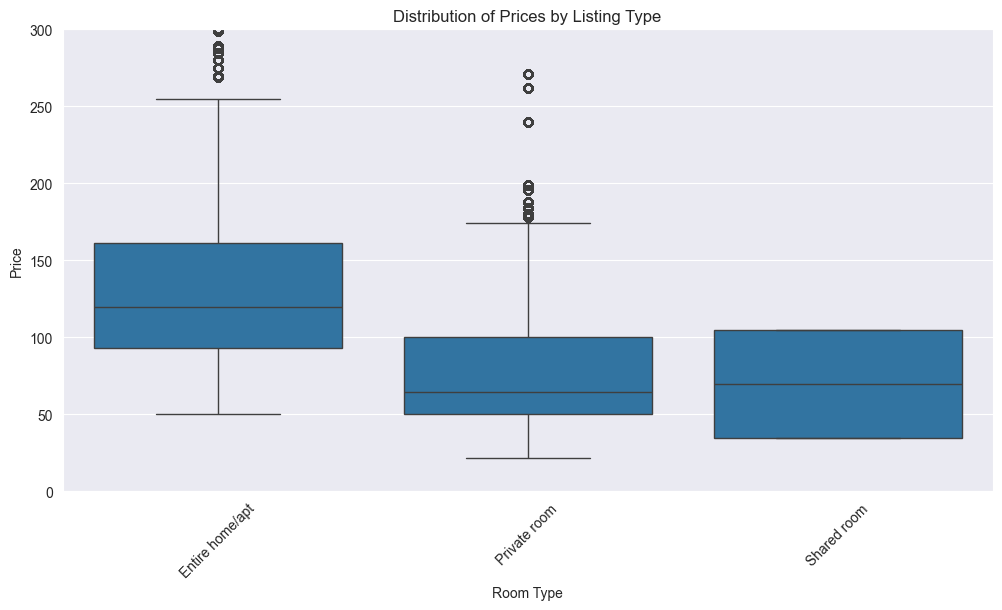

In [19]:
mergedata['price_x'] = mergedata['price_x'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 6))
sns.boxplot(data=mergedata, x='room_type', y='price_x')
plt.ylim(0,300)
plt.title('Distribution of Prices by Listing Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [20]:
mergedata[['latitude', 'longitude']]

,latitude,longitude
0,42.657890,-73.753700
1,42.657890,-73.753700
2,42.657890,-73.753700
3,42.657890,-73.753700
4,42.657890,-73.753700
...,...,...
155485,42.655071,-73.761511
155486,42.655071,-73.761511
155487,42.655071,-73.761511
155488,42.655071,-73.761511


In [ ]:
map = folium.Map(location=[42.65789, -73.7537], zoom_start=10)

# Her satırdaki latitude ve longitude değerine göre işaretleyici ekle
for _, row in mergedata.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker(
        location=[lat, lon],
        popup="New York",
        icon=folium.Icon(color="blue")
    ).add_to(map)

# Haritayı kaydet veya görüntüle
map



In [24]:
unique_prices_per_day = mergedata.groupby('date')['price_x'].nunique()
print(unique_prices_per_day.value_counts())

price_x
151    365
Name: count, dtype: int64


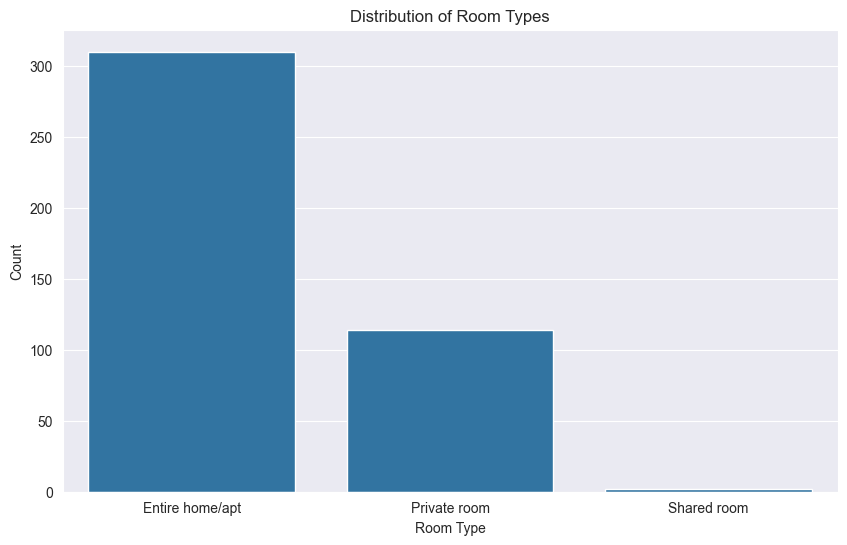

In [25]:
# Distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(data=lisdata, x='room_type', order=lisdata['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()